## Nastavení proměnných
Zde nastav všechny proměnné:

In [62]:
# maximalni mozny pocet linii v 1/16 uzemi
max_pocet_dilci = 20

# minimalni mozny pocet linii v 1/16 uzemi
min_pocet_dilci = 1

# idealni pocet pocet linii v 1/16 uzemi
ideal_pocet_dilci = 8

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# nacti vsechny csv soubory (vystupy funkce 1_hypsometrie.py)
ziv5 = pd.read_csv(r"C:\fenclova\diplomka\analyza\git_diplomka\1_hypsometrie\hypsometrie_ZIV5.csv").set_index("id")
ziv10 = pd.read_csv(r"C:\fenclova\diplomka\analyza\git_diplomka\1_hypsometrie\hypsometrie_ZIV10.csv").set_index("id")
ziv20 = pd.read_csv(r"C:\fenclova\diplomka\analyza\git_diplomka\1_hypsometrie\hypsometrie_ZIV20.csv").set_index("id")
orig = pd.read_csv(r"C:\fenclova\diplomka\analyza\git_diplomka\1_hypsometrie\Pocet_vrstevnic.csv").set_index("ID")

ziv5.head()


,ZIV5_pocet,ZIV5_1,ZIV5_2,ZIV5_3,ZIV5_4,ZIV5_5,ZIV5_6,ZIV5_7,ZIV5_8,ZIV5_9,ZIV5_10,ZIV5_11,ZIV5_12,ZIV5_13,ZIV5_14,ZIV5_15,ZIV5_16
id,,,,,,,,,,,,,,,,,
1,61,12,15,15,9,8,3,7,21,4,10,24,20,11,19,26,20
2,87,26,19,17,12,37,17,16,6,20,22,25,11,16,15,13,11
3,58,26,9,13,9,22,8,12,10,27,16,9,11,24,11,7,8
4,8,1,1,1,0,1,2,2,1,2,2,2,2,2,2,4,2
5,64,23,17,12,3,23,14,18,7,18,7,17,11,18,12,15,13


In [64]:
orig.head()
orig.columns = ['vrstevnice_orig']

In [65]:
# funkce vrátí True, když záznam splňuje podmínky (min a max pocet vrstevnic)
def libinelibi(radek):
    return all(map(lambda x: min_pocet_dilci <= x <= max_pocet_dilci, list(radek)[2:]))

# filtruji data podle fuknce libinelibi
filtered_ziv5 = ziv5[ziv5.apply(libinelibi, axis=1)]
filtered_ziv10 = ziv10[ziv10.apply(libinelibi, axis=1)]
filtered_ziv20 = ziv20[ziv20.apply(libinelibi, axis=1)]

In [66]:
filtered_ziv10.head()

,ZIV10_pocet,ZIV10_1,ZIV10_2,ZIV10_3,ZIV10_4,ZIV10_5,ZIV10_6,ZIV10_7,ZIV10_8,ZIV10_9,ZIV10_10,ZIV10_11,ZIV10_12,ZIV10_13,ZIV10_14,ZIV10_15,ZIV10_16
id,,,,,,,,,,,,,,,,,
1,31,6,8,8,5,4,2,4,11,2,5,12,10,6,9,13,10
2,43,13,9,8,6,19,9,8,3,10,11,13,6,8,7,7,5
3,28,13,5,7,4,11,4,6,5,14,8,4,6,12,5,3,4
5,31,12,9,6,1,12,7,9,3,9,3,9,5,9,6,8,7
11,27,10,3,3,3,4,3,3,2,4,4,3,8,2,8,6,7


In [67]:
# funkce sečte počet linií v 16 dílčích čtvercích
def soucet_dilcich_linii(radek):
    # odchylka return sum(map(lambda x: abs(x - ideal_pocet_dilci), list(radek)[2:]))
    return sum(map(lambda x: x, list(radek)[1:]))

# pro všech 16 dílků spočti součet linii v každém čtverečku
metrika_ziv5 = filtered_ziv5.apply(soucet_dilcich_linii, axis=1)
metrika_ziv10 = filtered_ziv10.apply(soucet_dilcich_linii, axis=1)
metrika_ziv20 = filtered_ziv20.apply(soucet_dilcich_linii, axis=1)

In [68]:
metrika_ziv10.head()

id
1     115
2     142
3     111
5     115
11     73
dtype: int64

In [69]:
# vytvoř dataframe jen z hodnot ID > pro následný join (i nevypočtená 803)
zaklad = pd.DataFrame(range(0,876))
zaklad.columns = ['ID']
zaklad[800:805]


,ID
800,800
801,801
802,802
803,803
804,804


In [70]:
# z vyfiltrovaných hodnot vytvoř dataframy
a5 = metrika_ziv5.to_frame()
a5.columns = ['ziv5_sum16']

a10 = metrika_ziv10.to_frame()
a10.columns = ['ziv10_sum16']

a20 = metrika_ziv20.to_frame()
a20.columns = ['ziv20_sum16']

In [71]:
a10.head()

,ziv10_sum16
id,
1,115
2,142
3,111
5,115
11,73


In [72]:
# pocet ZIV5
ziv5_pocet = ziv5[['ZIV5_pocet']]
ziv10_pocet = ziv10[['ZIV10_pocet']]
ziv20_pocet = ziv20[['ZIV20_pocet']]

ziv_pocet = zaklad.join(ziv5_pocet).join(ziv10_pocet).join(ziv20_pocet)
ziv_pocet.head()
ziv_pocet[800:805]

,ID,ZIV5_pocet,ZIV10_pocet,ZIV20_pocet
800,800,174.0,88.0,44.0
801,801,112.0,58.0,30.0
802,802,87.0,44.0,23.0
803,803,NaN,NaN,NaN
804,804,86.0,44.0,22.0


In [73]:
# spoj tabulky
ziv_sum_pocet = ziv_pocet.join(a5).join(a10).join(a20)
ziv_sum_pocet.head()
#ziv_sum_pocet[800:805]

,ID,ZIV5_pocet,ZIV10_pocet,ZIV20_pocet,ziv5_sum16,ziv10_sum16,ziv20_sum16
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,61.0,31.0,16.0,NaN,115.0,57.0
2,2,87.0,43.0,23.0,NaN,142.0,75.0
3,3,58.0,28.0,14.0,NaN,111.0,56.0
4,4,8.0,4.0,2.0,NaN,NaN,NaN


In [74]:
ideal_sum = ideal_pocet_dilci*16
ideal_sum

128

In [75]:
# hodnoty NaN nahraď číslem 99999
fill_ziv_sum_pocet = ziv_sum_pocet.fillna(99999)
fill_ziv_sum_pocet.head()

,ID,ZIV5_pocet,ZIV10_pocet,ZIV20_pocet,ziv5_sum16,ziv10_sum16,ziv20_sum16
0,0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
1,1,61.0,31.0,16.0,99999.0,115.0,57.0
2,2,87.0,43.0,23.0,99999.0,142.0,75.0
3,3,58.0,28.0,14.0,99999.0,111.0,56.0
4,4,8.0,4.0,2.0,99999.0,99999.0,99999.0


In [76]:
# vyber ZIV, který je blíže k ideálnímu počtu linií (zivX_sum16 closer to ideal_sum)

def vhodny_ziv(radek):
    odchylka5 = abs(radek['ziv5_sum16'] - ideal_sum)
    odchylka10 = abs(radek['ziv10_sum16'] - ideal_sum)
    odchylka20 = abs(radek['ziv20_sum16'] - ideal_sum)
    array = [odchylka5, odchylka10, odchylka20]
    
    idx = array.index(min(array))
    
    if (odchylka5 == odchylka10 == odchylka20): ziv = 99999 # pokud ani jeden ZIV neslpnuje "libinelibi"
    elif idx == 0: ziv = 5
    elif idx == 1: ziv = 10
    elif idx == 2: ziv = 20
        
    return ziv

vhodny_ziv = fill_ziv_sum_pocet.apply(vhodny_ziv, axis=1).to_frame()
vhodny_ziv.columns = ['vhodny_ziv']
vhodny_ziv.head()


,vhodny_ziv
0,99999
1,10
2,10
3,10
4,99999


In [77]:
# četnost ZIV
vhodny_ziv.vhodny_ziv.value_counts()

5        345
10       286
20       128
99999    117
Name: vhodny_ziv, dtype: int64

In [78]:
vhodny_ziv = fill_ziv_sum_pocet.join(vhodny_ziv) # prestalo fungovat kdyz ziv = NaN
vhodny_ziv.head()

,ID,ZIV5_pocet,ZIV10_pocet,ZIV20_pocet,ziv5_sum16,ziv10_sum16,ziv20_sum16,vhodny_ziv
0,0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999
1,1,61.0,31.0,16.0,99999.0,115.0,57.0,10
2,2,87.0,43.0,23.0,99999.0,142.0,75.0,10
3,3,58.0,28.0,14.0,99999.0,111.0,56.0,10
4,4,8.0,4.0,2.0,99999.0,99999.0,99999.0,99999


In [79]:
# pridej sloupec soucet podle vhodneho ziv = 5 OR 10 OR 20

def metrika_vhodny_soucet(radek):
    if radek.vhodny_ziv == 5: soucet = radek.ziv5_sum16
    elif radek.vhodny_ziv == 10: soucet = radek.ziv10_sum16
    elif radek.vhodny_ziv == 20: soucet = radek.ziv20_sum16
    else: soucet = 99999
    
    return soucet

vhodny_soucet = vhodny_ziv.apply(metrika_vhodny_soucet, axis=1).to_frame()
vhodny_soucet.columns = ['vhodny_soucet']
vhodny_soucet.head()

,vhodny_soucet
0,99999.0
1,115.0
2,142.0
3,111.0
4,99999.0


In [80]:
# pridej sloupec nejvhodnejsi pocet podle vhodny ziv = 5 OR 10 OR 20

def metrika_vhodny_pocet(radek):
    if radek.vhodny_ziv == 5: pocet = radek.ZIV5_pocet
    elif radek.vhodny_ziv == 10: pocet = radek.ZIV10_pocet
    elif radek.vhodny_ziv == 20: pocet = radek.ZIV20_pocet
    else: pocet = 99999
    
    return pocet

vhodny_pocet = vhodny_ziv.apply(metrika_vhodny_pocet, axis=1).to_frame()
vhodny_pocet.columns = ['vhodny_pocet']
vhodny_pocet.head()

,vhodny_pocet
0,99999.0
1,31.0
2,43.0
3,28.0
4,99999.0


In [81]:
hypsometrie_analyza = vhodny_ziv.join(vhodny_soucet).join(vhodny_pocet).join(orig)
hypsometrie_analyza = hypsometrie_analyza.fillna(99999)
hypsometrie_analyza.head()

,ID,ZIV5_pocet,ZIV10_pocet,ZIV20_pocet,ziv5_sum16,ziv10_sum16,ziv20_sum16,vhodny_ziv,vhodny_soucet,vhodny_pocet,vrstevnice_orig
0,0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999,99999.0,99999.0,99999.0
1,1,61.0,31.0,16.0,99999.0,115.0,57.0,10,115.0,31.0,185.0
2,2,87.0,43.0,23.0,99999.0,142.0,75.0,10,142.0,43.0,142.0
3,3,58.0,28.0,14.0,99999.0,111.0,56.0,10,111.0,28.0,139.0
4,4,8.0,4.0,2.0,99999.0,99999.0,99999.0,99999,99999.0,99999.0,11.0


Text(0.5,0,u'Soucet linii v 16 ctvercich 1x1 km')

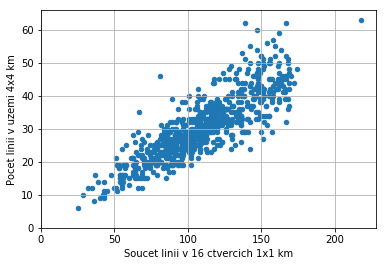

In [82]:
# graf zavislosti součtu v 16 dílčích a celkového počtu vrstevnic
# TODO coding utf-8

a = hypsometrie_analyza[hypsometrie_analyza.vhodny_ziv != 99999] # 759 záznamů
ax= a[['vhodny_soucet', 'vhodny_pocet']].plot(x='vhodny_soucet', 
                                                                y='vhodny_pocet', 
                                                                kind='scatter', 
                                                                ylim=0, xlim=0, 
                                                                grid=True)

ax.set_ylabel('Pocet linii v uzemi 4x4 km') # Počet linií v území 4 x 4 km
ax.set_xlabel('Soucet linii v 16 ctvercich 1x1 km')

Text(0.5,0,u'Pocet puvodnich vrstevnic (ziv 5 m)')

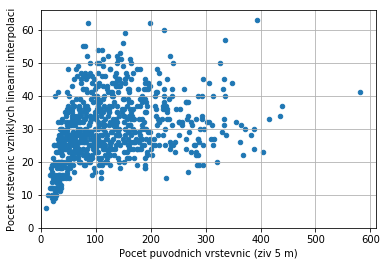

In [83]:
# graf zavislosti celkového počtu vrstevnic a originálního počtu vrstevnic
# TODO coding utf-8

b = hypsometrie_analyza[(hypsometrie_analyza.vhodny_ziv != 99999) 
                        & (hypsometrie_analyza.vrstevnice_orig != 99999)]
ax= b[['vrstevnice_orig', 'vhodny_pocet']].plot(x='vrstevnice_orig', 
                                                                y='vhodny_pocet', 
                                                                kind='scatter', 
                                                                ylim=0, xlim=0, 
                                                                grid=True)

ax.set_ylabel('Pocet vrstevnic vzniklych linearni interpolaci')
ax.set_xlabel('Pocet puvodnich vrstevnic (ziv 5 m)')

In [84]:
# TODO
# pridej sloupec kategorie podle hodnoty odchylky od idealu > vytvor kategorie
h1 =16*1
h2 =16
h3 =16
h4 =16*8
h5 =16
h6 =16
h7 =16*20
h1, h2, h3, h4, h5, h6, h7

(16, 16, 16, 128, 16, 16, 320)

In [88]:
final = hypsometrie_analyza[['vhodny_ziv', 'vhodny_soucet', 'vhodny_pocet', 'vrstevnice_orig']]
final.index.names = ['ID']
final.head()

,vhodny_ziv,vhodny_soucet,vhodny_pocet,vrstevnice_orig
ID,,,,
0,99999,99999.0,99999.0,99999.0
1,10,115.0,31.0,185.0
2,10,142.0,43.0,142.0
3,10,111.0,28.0,139.0
4,99999,99999.0,99999.0,11.0


In [89]:
# ulozim dataframe jako novy csv soubor
final.to_csv('1_hypsometrie_analyza.csv')

In [90]:
test = pd.read_csv('1_hypsometrie_analyza.csv')
test.head()

,ID,vhodny_ziv,vhodny_soucet,vhodny_pocet,vrstevnice_orig
0,0,99999,99999.0,99999.0,99999.0
1,1,10,115.0,31.0,185.0
2,2,10,142.0,43.0,142.0
3,3,10,111.0,28.0,139.0
4,4,99999,99999.0,99999.0,11.0
